In [21]:
import os, shutil
import os.path
original_dataset_dir = 'D:\AI_ML\Dog_vs_Cat\petImages'
base_dir = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small'
#This and subsequent if statements serve to prevent the remaking of directories
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

train_dir = os.path.join(base_dir, 'train')
if not os.path.exists(train_dir):
    os.mkdir(train_dir)
validation_dir = os.path.join(base_dir, 'validation')
if not os.path.exists(validation_dir):
    os.mkdir(validation_dir)
test_dir = os.path.join(base_dir, 'test')
if not os.path.exists(test_dir):
    os.mkdir(test_dir)

train_cats_dir = os.path.join(train_dir, 'cats')
if not os.path.exists(train_cats_dir):
    os.mkdir(train_cats_dir)
train_dogs_dir = os.path.join(train_dir, 'dogs')
if not os.path.exists(train_dogs_dir):
    os.mkdir(train_dogs_dir)

validation_cats_dir = os.path.join(validation_dir, 'cats')
if not os.path.exists(validation_cats_dir):
    os.mkdir(validation_cats_dir)
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
if not os.path.exists(validation_dogs_dir):
    os.mkdir(validation_dogs_dir)

test_cats_dir = os.path.join(test_dir, 'cats')
if not os.path.exists(test_cats_dir):
    os.mkdir(test_cats_dir)
test_dogs_dir = os.path.join(test_dir, 'dogs')
if not os.path.exists(test_dogs_dir):
    os.mkdir(test_dogs_dir)

print(train_cats_dir)

#Loading cat images into train, validation, and test directories
#This and subsequent if statements serve to prevent repopulating directories if they already have images
#if len(os.listdir(train_cats_dir)) == 0:
fnames = ['cat({}).jpg'.format(i) for i in range(1, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

#if len(os.listdir(validation_cats_dir)) == 0:
fnames = ['cat({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

#if len(os.listdir(test_cats_dir)) == 0:
fnames = ['cat({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)


#Loading dog images into train, validation, and test directories
#if len(os.listdir(train_dogs_dir)) == 0:
fnames = ['dog({}).jpg'.format(i) for i in range(1, 1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

#if len(os.listdir(validation_dogs_dir)) == 0:
fnames = ['dog({}).jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

#if len(os.listdir(test_dogs_dir)) == 0:
fnames = ['dog({}).jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)


D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small\train\cats


In [22]:
print('total cat training images: ', len(os.listdir(train_cats_dir)))
print('total dog training images: ', len(os.listdir(train_dogs_dir)))
print('total cat validation images: ', len(os.listdir(validation_cats_dir)))
print('total dog validation images: ', len(os.listdir(validation_dogs_dir)))
print('total cat test images: ', len(os.listdir(test_cats_dir)))
print('total dog test images: ', len(os.listdir(test_dogs_dir)))

total cat training images:  999
total dog training images:  999
total cat validation images:  500
total dog validation images:  500
total cat test images:  500
total dog test images:  500


In [23]:
import keras
from keras import layers
from keras import models
from keras.layers.normalization import BatchNormalization

#Changed Conv2D to SeparableConv2D, optimizer to rmsprop, and loss to categorical_crossentropy
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
#Adding dropout to help combat overfittingmodel.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(layers.Dense(1, activation='sigmoid'))


In [24]:
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# optimizer chaged to rmsprop
model.compile(loss='binary_crossentropy', optimizer=optimizers.rmsprop(lr=0.0001), metrics=['acc'])

#Adding data augmentation to help combat overfitting
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    rotation_range=40, 
    width_shift_range=0.2, 
    height_shift_range=0.2, 
    shear_range=0.2, 
    zoom_range=0.2, 
    horizontal_flip=True)
# train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

# batch size changed to 37 to use all samples
train_generator = train_datagen.flow_from_directory(train_dir, target_size=(150, 150), batch_size=37, class_mode='binary', shuffle=True)
# batch size changed to 25 to use all samples
validation_generator = test_datagen.flow_from_directory(validation_dir, target_size=(150, 150), batch_size=100, class_mode='binary', shuffle=True)
model.summary()

Found 1998 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
batch_normalization_11 (Batc (None, 148, 148, 32)      128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
batch_normalization_12 (Batc (None, 72, 72, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 64)        0         
____________________________________

In [25]:
history = model.fit_generator(train_generator, steps_per_epoch=50, epochs=50, validation_data=validation_generator, validation_steps=50)

model.save('dogs_and_cats_small_10.h5')

Epoch 1/10
50/50 [==============================] - 24s 480ms/step - loss: 0.8025 - acc: 0.5816 - val_loss: 0.9474 - val_acc: 0.5000
Epoch 2/10
50/50 [==============================] - 17s 347ms/step - loss: 0.7020 - acc: 0.6551 - val_loss: 1.9090 - val_acc: 0.5000
Epoch 3/10
50/50 [==============================] - 17s 334ms/step - loss: 0.6657 - acc: 0.6643 - val_loss: 1.7347 - val_acc: 0.5000
Epoch 4/10
50/50 [==============================] - 16s 328ms/step - loss: 0.6427 - acc: 0.6843 - val_loss: 2.1205 - val_acc: 0.5000
Epoch 5/10
50/50 [==============================] - 16s 319ms/step - loss: 0.6521 - acc: 0.6778 - val_loss: 1.8945 - val_acc: 0.5000
Epoch 6/10
50/50 [==============================] - 16s 319ms/step - loss: 0.6334 - acc: 0.6865 - val_loss: 1.5605 - val_acc: 0.5030
Epoch 7/10
50/50 [==============================] - 16s 319ms/step - loss: 0.5793 - acc: 0.7054 - val_loss: 1.3865 - val_acc: 0.5170
Epoch 8/10
50/50 [==============================] - 16s 319ms/step - 

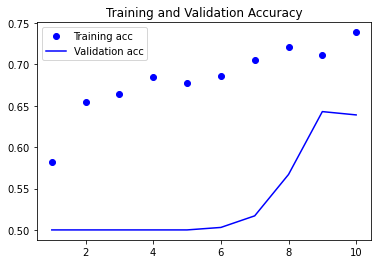

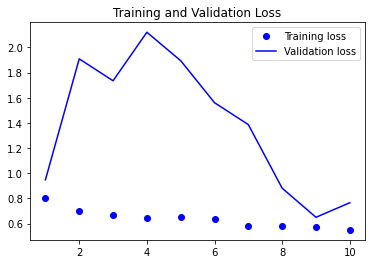

In [26]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [27]:
from keras.preprocessing import image
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

img_path = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small\\test\cats\cat(1630).jpg'
img_path2 = 'D:\AI_ML\Dog_vs_Cat\dogs_and_cats_small\\test\dogs\dog(1680).jpg'
image_paths = []
for i in range(20):
    if i % 2:
        image_paths.append('D:\AI_ML\Dog_vs_Cat\PetImages\\cat(' + '%s' % (i + 1) + ').jpg')
    else:
        image_paths.append('D:\AI_ML\Dog_vs_Cat\PetImages\\dog(' + '%s' % (i  + 1) + ').jpg')

images = []
for j in range(len(image_paths)):
    images.append(image.img_to_array(image.load_img(image_paths[j], target_size=(150,150))) / 255.)
    images[j] = np.expand_dims(images[j], axis=0)

# x = image.img_to_array(image.load_img(img_path, target_size=(150,150))) / 255.
# x = np.expand_dims(x, axis=0)

# y = image.img_to_array(image.load_img(img_path2, target_size=(150,150))) / 255.
# y = np.expand_dims(y, axis=0)

This is a dog


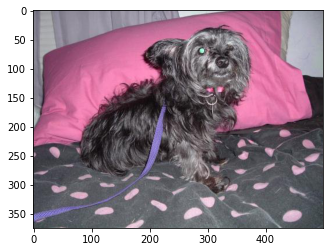

Predicted: [[0.7793916]]
This is a cat


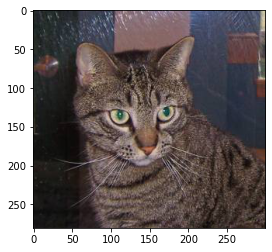

Predicted: [[0.12004703]]
This is a cat


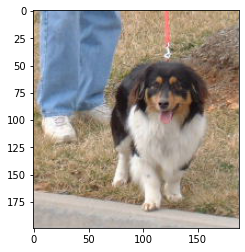

Predicted: [[0.41973573]]
This is a cat


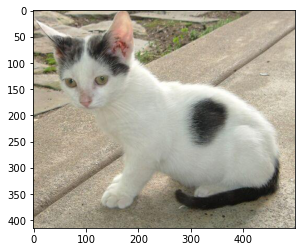

Predicted: [[0.12166394]]
This is a cat


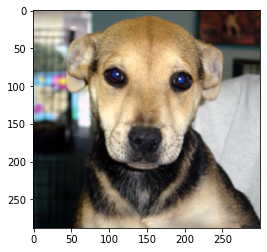

Predicted: [[0.2028038]]
This is a cat


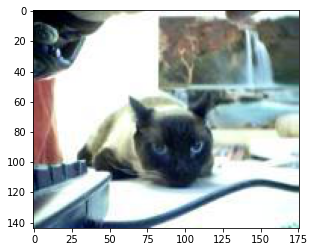

Predicted: [[0.21644938]]
This is a dog


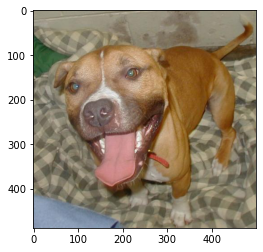

Predicted: [[0.66137946]]
This is a cat


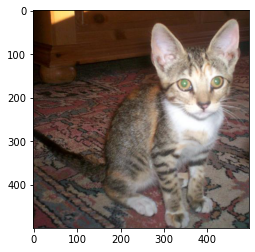

Predicted: [[0.16628209]]
This is a dog


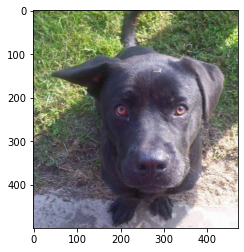

Predicted: [[0.57149196]]
This is a cat


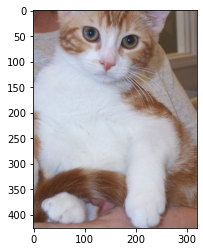

Predicted: [[0.00694895]]
This is a cat


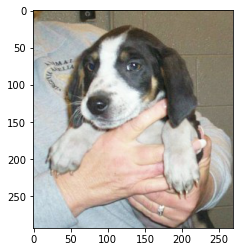

Predicted: [[0.06648014]]
This is a cat


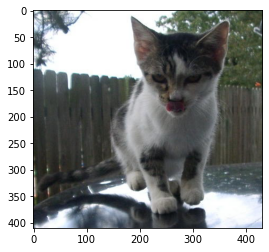

Predicted: [[0.16718921]]
This is a cat


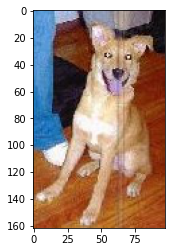

Predicted: [[0.08983844]]
This is a cat


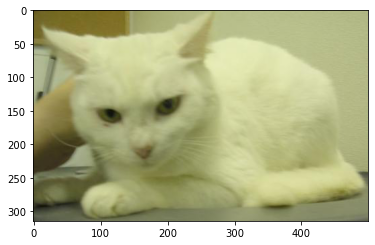

Predicted: [[0.07542869]]
This is a cat


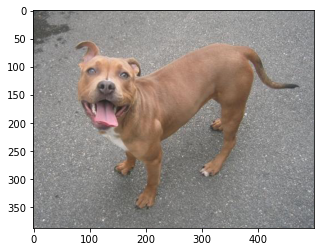

Predicted: [[0.49872398]]
This is a cat


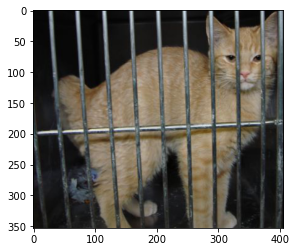

Predicted: [[0.04119886]]
This is a cat


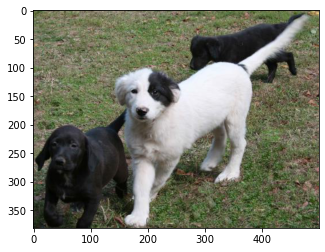

Predicted: [[0.26206067]]
This is a cat


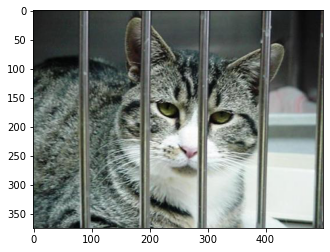

Predicted: [[0.08980842]]
This is a dog


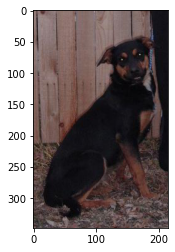

Predicted: [[0.66560227]]
This is a cat


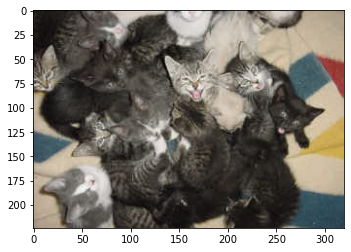

Predicted: [[0.12054226]]


In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator

for x in range(len(images)):
    preds = model.predict(images[x])
    if preds > 0.5:
        print('This is a dog')
    else:
        print('This is a cat')
    displayImg = mpimg.imread(image_paths[x])
    imgplot = plt.imshow(displayImg)
    plt.show()
    print('Predicted:', preds)


# preds = model.predict(x, batch_size=1)
# if preds > 0.5:
#     print('This is a dog')
# else:
#     print('This is a cat')
# displayImg = mpimg.imread(img_path)
# imgplot = plt.imshow(displayImg)
# plt.show()
# print('Predicted:', preds)

# preds2 = model.predict(y)
# if preds2 > 0.5:
#     print('This is a dog')
# else:
#     print('This is a cat')
# displayImg2 = mpimg.imread(img_path2)
# imgplot = plt.imshow(displayImg2)
# plt.show()
# print('Predicted:', preds2)
# print(preds)
# print(preds2)

In [29]:
import cv2
from keras.preprocessing import image
import numpy as np

cv2.namedWindow("preview")
vc = cv2.VideoCapture(0)

if vc.isOpened():
    rval, frame = vc.read()
else:
    rval = False

while rval:


    prediction = model.predict(np.expand_dims((cv2.resize(frame, (150,150)) / 255.), axis=0))[0][0] * 100
    # text 
    text = str(round(prediction, 2))
    # font 
    font = cv2.FONT_HERSHEY_SIMPLEX 
    # org 
    org = (00, 185) 
    # fontScale 
    fontScale = 1
    # Red color in BGR 
    color = (0, 0, 255) 
    # Line thickness of 2 px 
    thickness = 2
    # Using cv2.putText() method 
    image = cv2.putText(frame, text, org, font, fontScale, color, thickness, cv2.LINE_AA) 
    cv2.imshow("preview", image)
    rval, frame = vc.read()
    key = cv2.waitKey(20)
    if key == 27: #ESC character
        break
cv2.destroyWindow("preview")